In [21]:
# Matt Sloane (ms9548)
# Homework 3 - Assignment 2: CitiBike Data Analysis

from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
import zipfile
%pylab inline

# IMPORT DATA (AVAILABLE TO EVERY USER)

datestring = '201502'    #USER SPECIFICED DATASET - FEBRUARY 2015
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"

zf = zipfile.ZipFile(datestring+'-citibike-tripdata.zip')
df = pd.read_csv(zf.open(datestring+'-citibike-tripdata.csv'))

Populating the interactive namespace from numpy and matplotlib
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4708k  100 4708k    0     0  8211k      0 --:--:-- --:--:-- --:--:-- 11.0M


In [35]:
# RENDER TOP ROWS OF DATA FRAME
df['date'] = pd.to_datetime(df['starttime'])   #Convert 'starttime' column to readable date format
df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00
5,717,2/1/2015 0:02,2/1/2015 0:14,373,Willoughby Ave & Walworth St,40.693317,-73.953820,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,15854,Subscriber,1979.0,1,2015-02-01 00:02:00
6,1306,2/1/2015 0:04,2/1/2015 0:26,352,W 56 St & 6 Ave,40.763406,-73.977225,504,1 Ave & E 15 St,40.732219,-73.981656,15173,Subscriber,1983.0,1,2015-02-01 00:04:00
7,913,2/1/2015 0:04,2/1/2015 0:19,439,E 4 St & 2 Ave,40.726281,-73.989780,116,W 17 St & 8 Ave,40.741776,-74.001497,17862,Subscriber,1955.0,1,2015-02-01 00:04:00
8,759,2/1/2015 0:04,2/1/2015 0:17,335,Washington Pl & Broadway,40.729039,-73.994046,2012,E 27 St & 1 Ave,40.739445,-73.976806,21183,Subscriber,1985.0,2,2015-02-01 00:04:00
9,585,2/1/2015 0:05,2/1/2015 0:15,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,444,Broadway & W 24 St,40.742354,-73.989151,14843,Subscriber,1982.0,1,2015-02-01 00:05:00


# Idea - Subscribers may be using citibike during the week for commute purposes

## Null Hypothesis - Nonsubscribers use citibikes during the week as much as or more than subscribers

## Alt Hypothesis - Subscribers are more likely to use citibikes during the week 
## (sigma = 0.05, 95% certainty)

In [106]:
# REDUCTED DATA FRAME
data_reduct = df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,13,14]], axis =1)

# Convert usertype variable to ordinal (Subscriber = 1)

data_reduct['usertype'] = data_reduct['usertype'].replace(['Subscriber','Customer'],[1,2])
data_reduct.head()

,usertype,date
0,1,2015-02-01 00:00:00
1,1,2015-02-01 00:00:00
2,1,2015-02-01 00:01:00
3,1,2015-02-01 00:01:00
4,1,2015-02-01 00:01:00


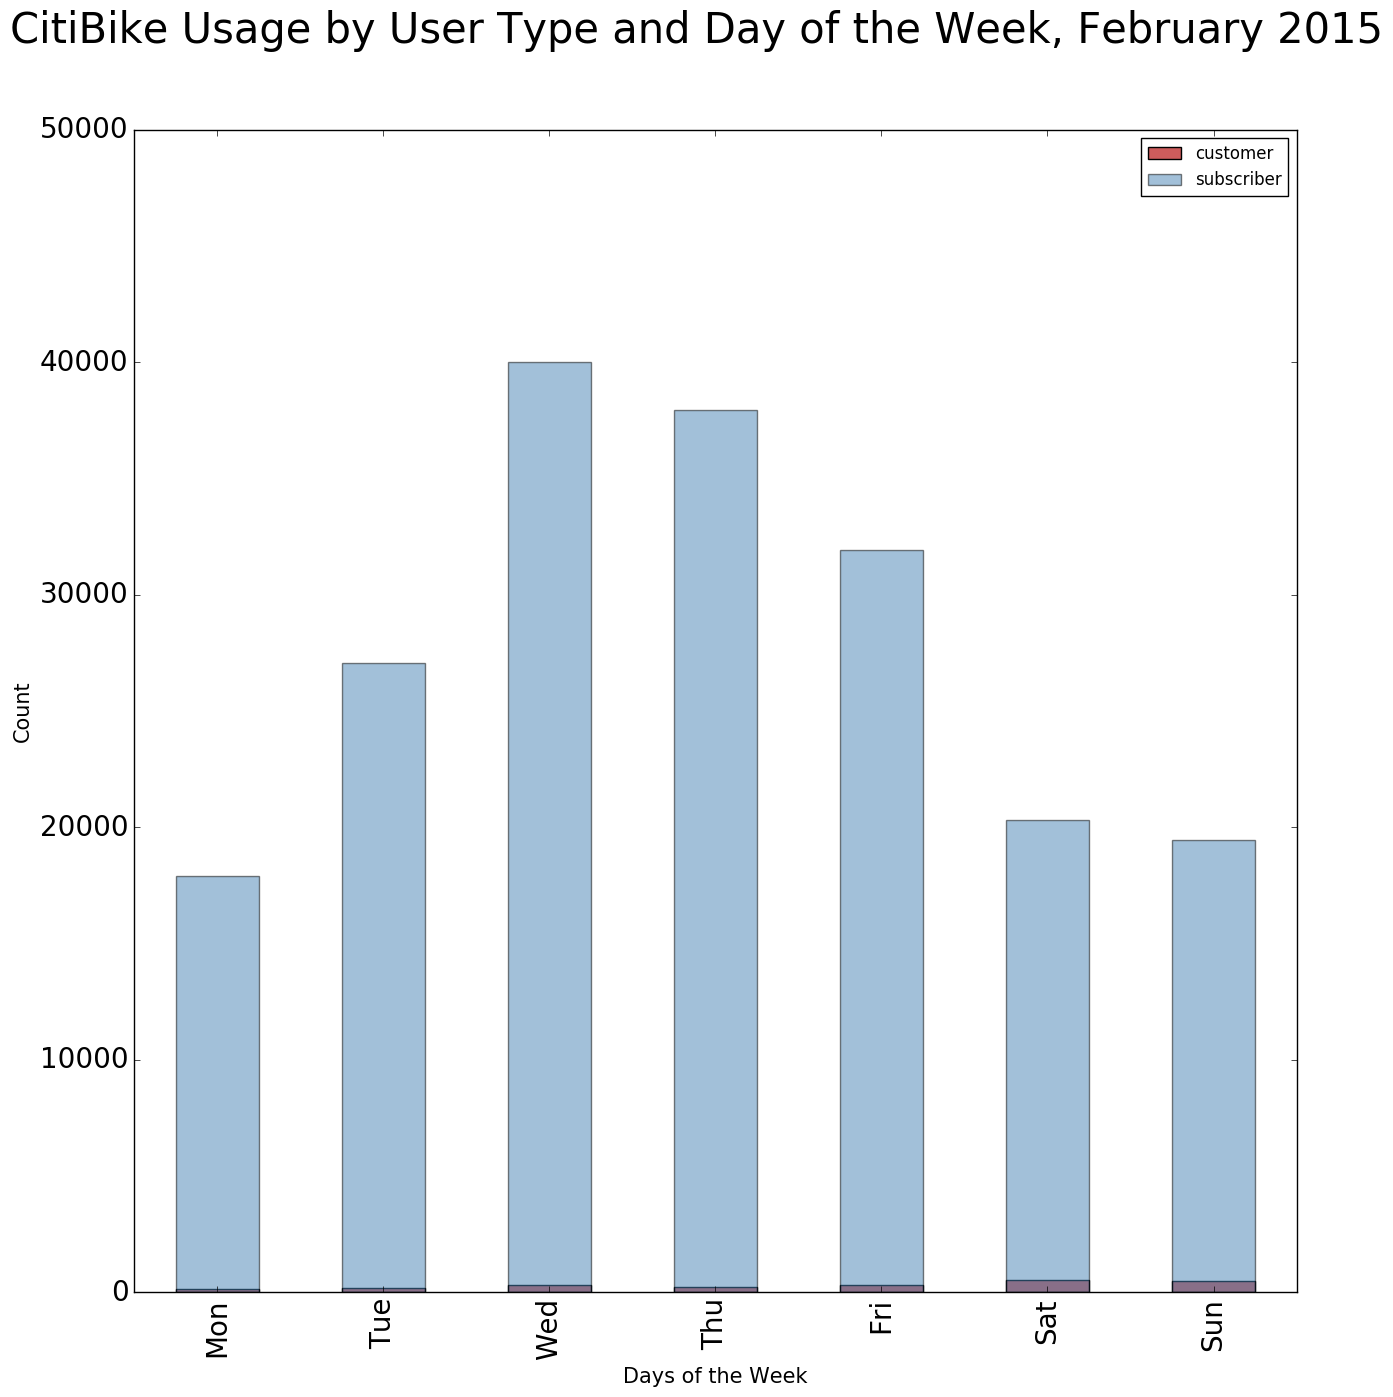

In [105]:
# PLOT VARIABLES VERSUS ONE ANOTHER

fig = pl.figure(figsize(15,15))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
((data_reduct['date'][data_reduct['usertype'] == 2].groupby([data_reduct['date'].dt.weekday]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='customer')

norm_m = 1
ax = ((data_reduct['date'][data_reduct['usertype'] == 1].groupby([data_reduct['date'].dt.weekday]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='subscriber')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
tmp2 = ax.yaxis.set_ticklabels([0,10000,20000,30000,40000,50000],fontsize=20)
ax.set_ylim([0,50000])
pl.xlabel('Days of the Week', fontsize = 15)
pl.ylabel('Count', fontsize = 15)
pl.legend()
pl.suptitle('CitiBike Usage by User Type and Day of the Week, February 2015', fontsize = 30)